In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Customer Churn Dataset

In [2]:
df=pd.read_csv('/kaggle/input/customer-churn/customer_churn.csv')

In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['Male']=pd.get_dummies(df['gender'],drop_first=True,dtype=int)

In [8]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,1


In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Male'],
      dtype='object')

# Exploratory Data Anlaysis (EDA)

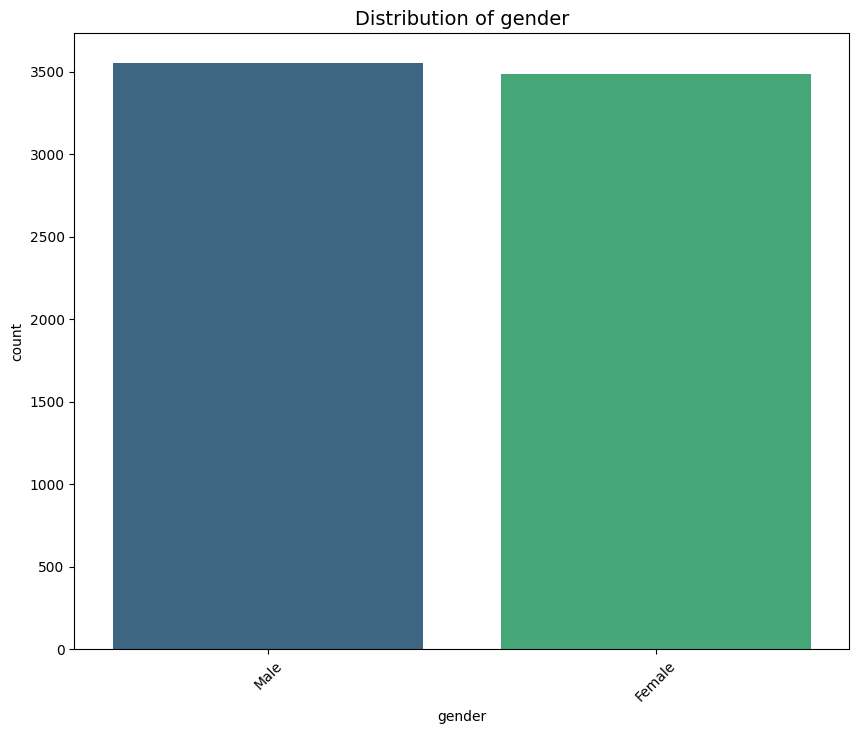

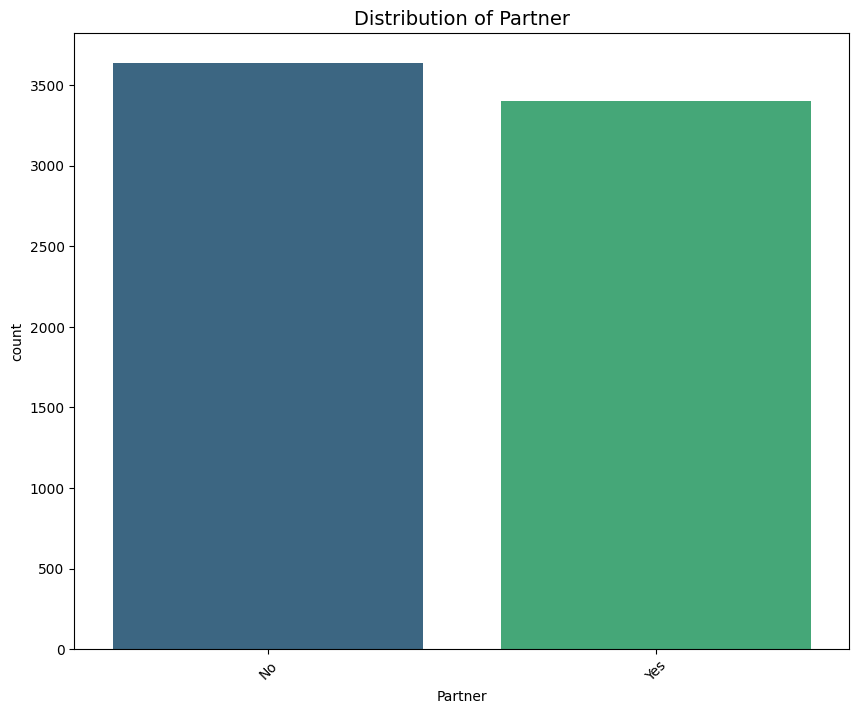

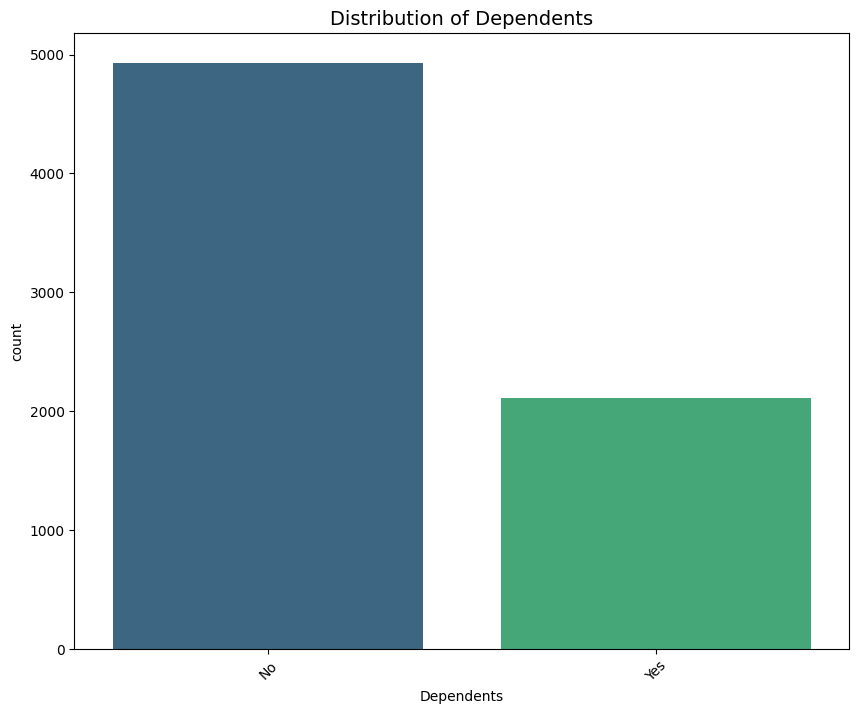

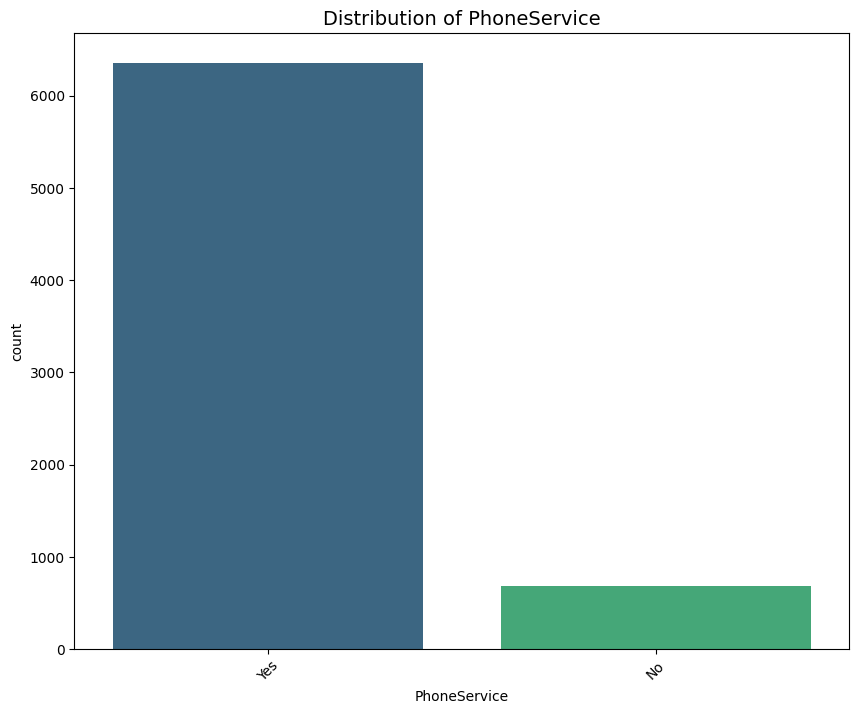

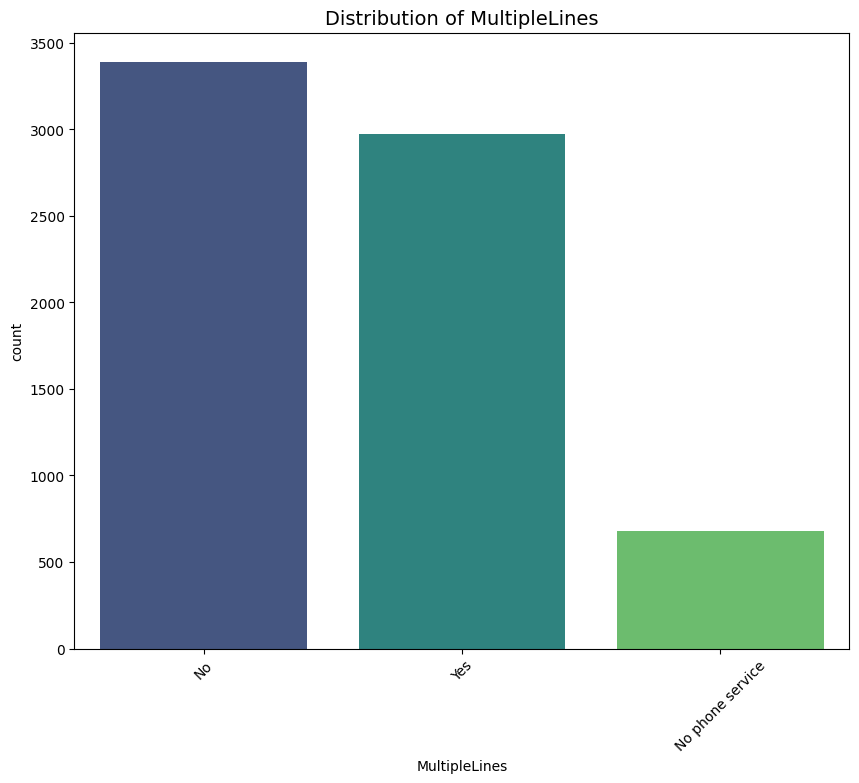

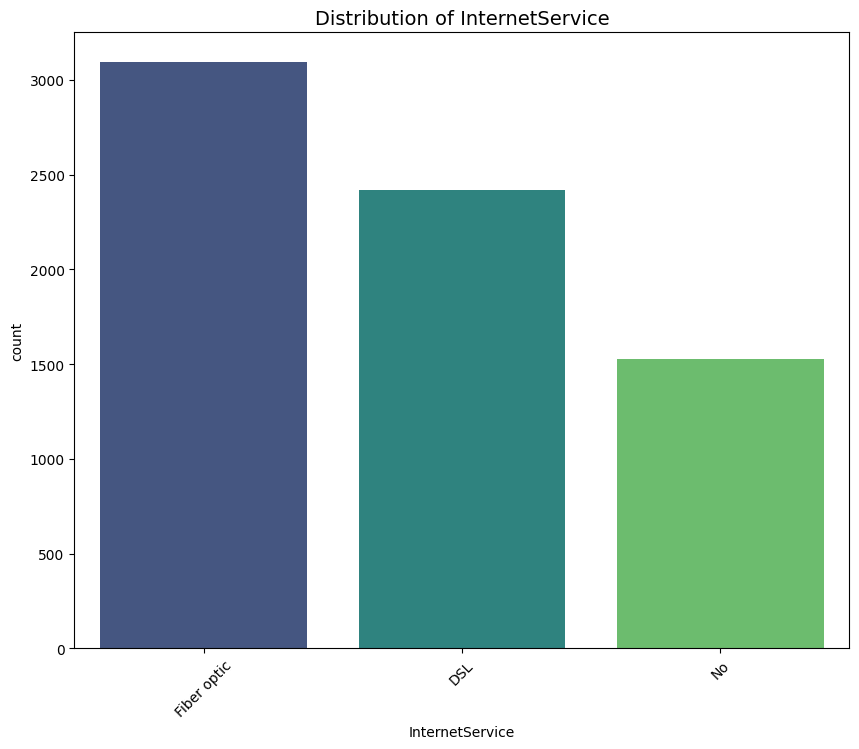

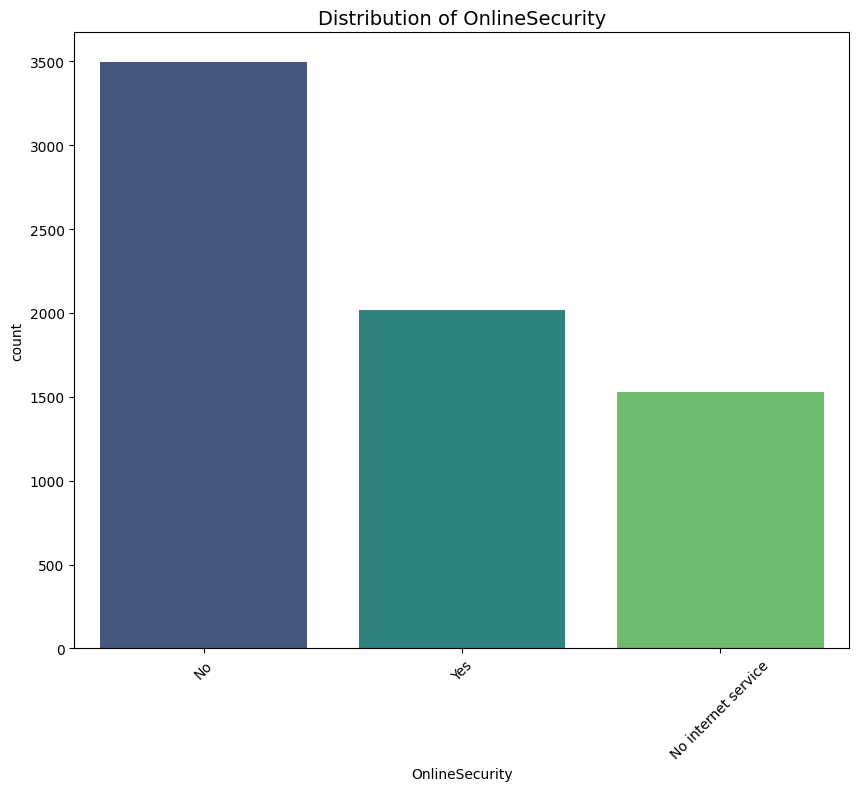

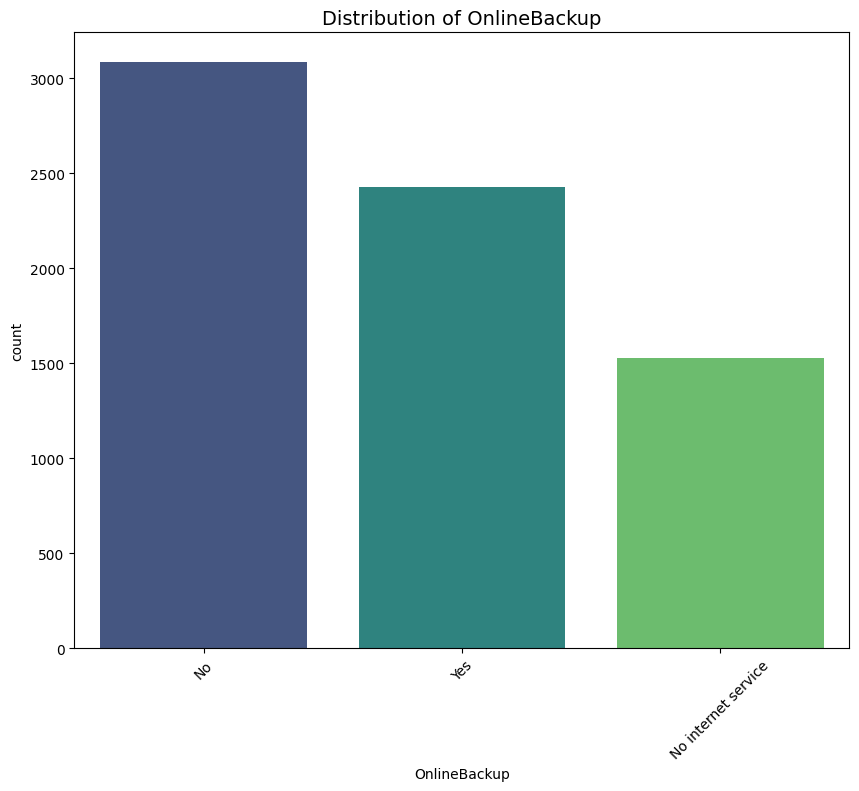

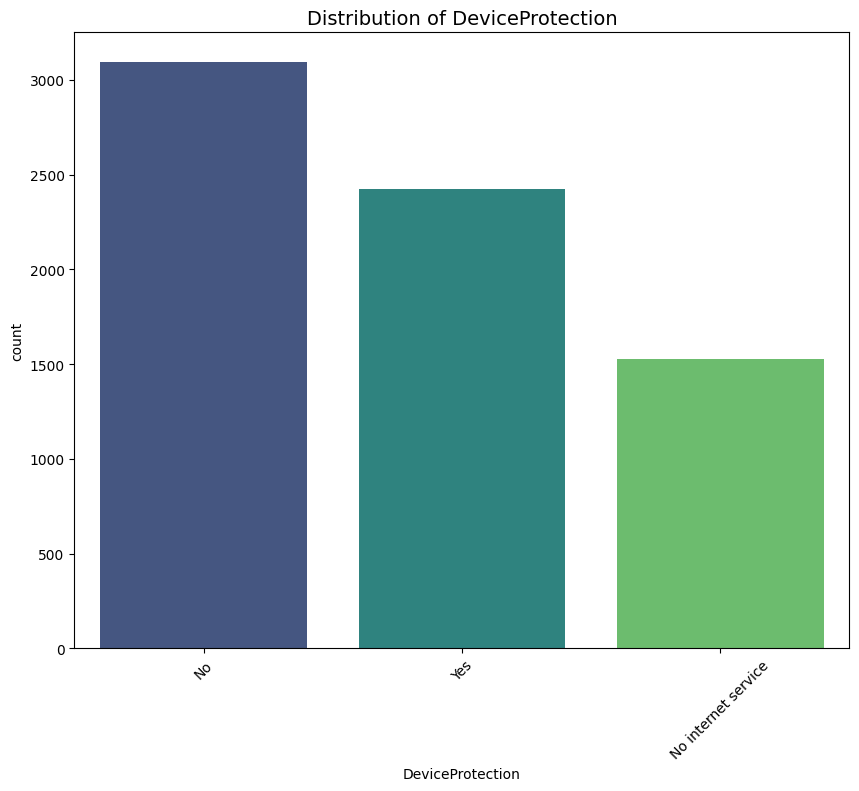

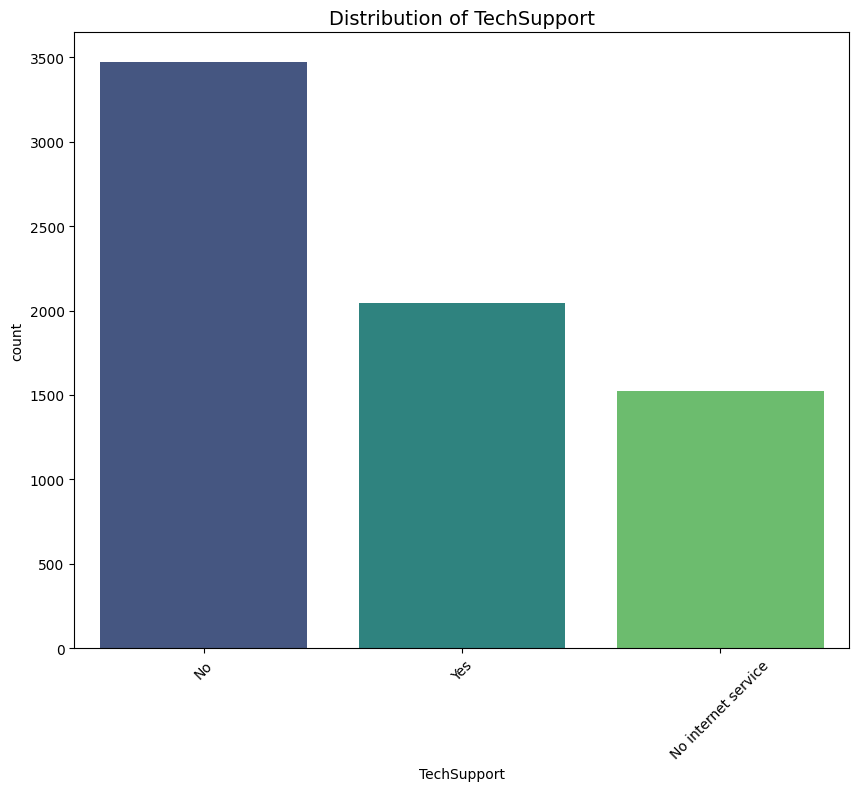

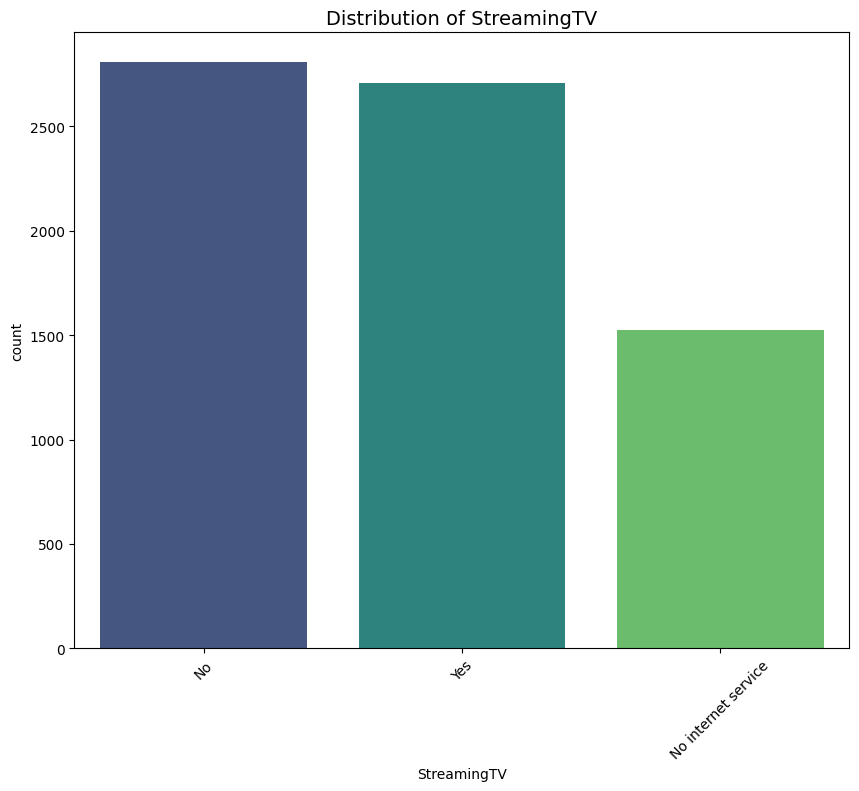

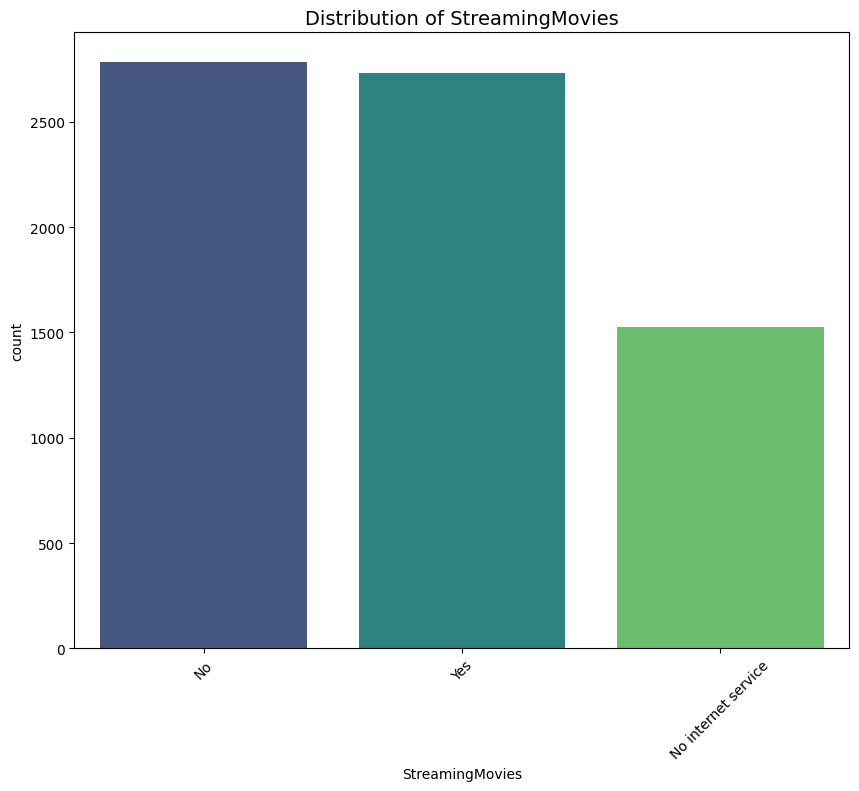

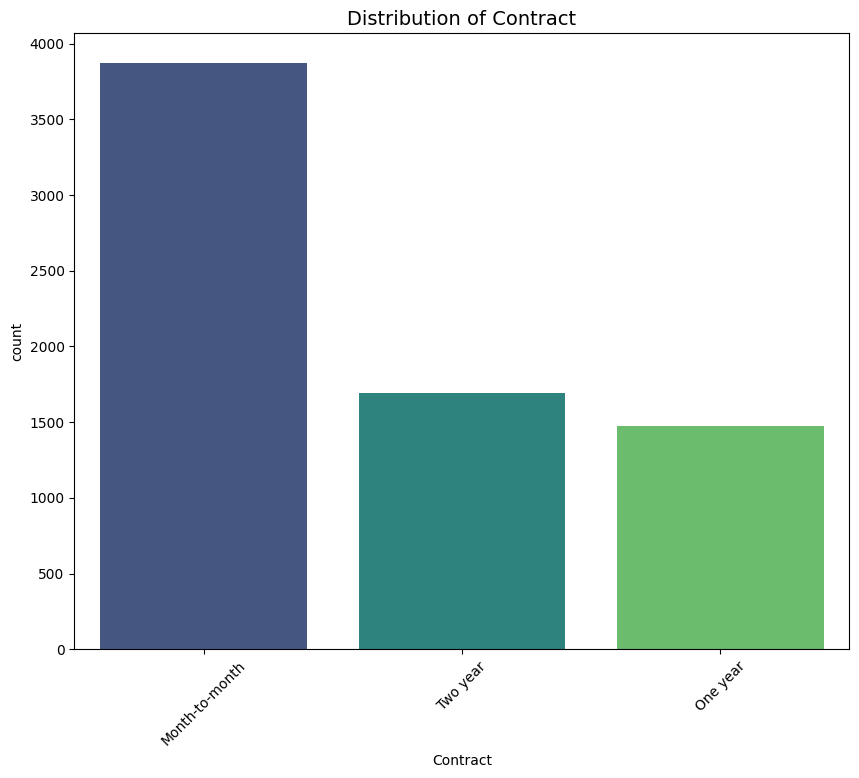

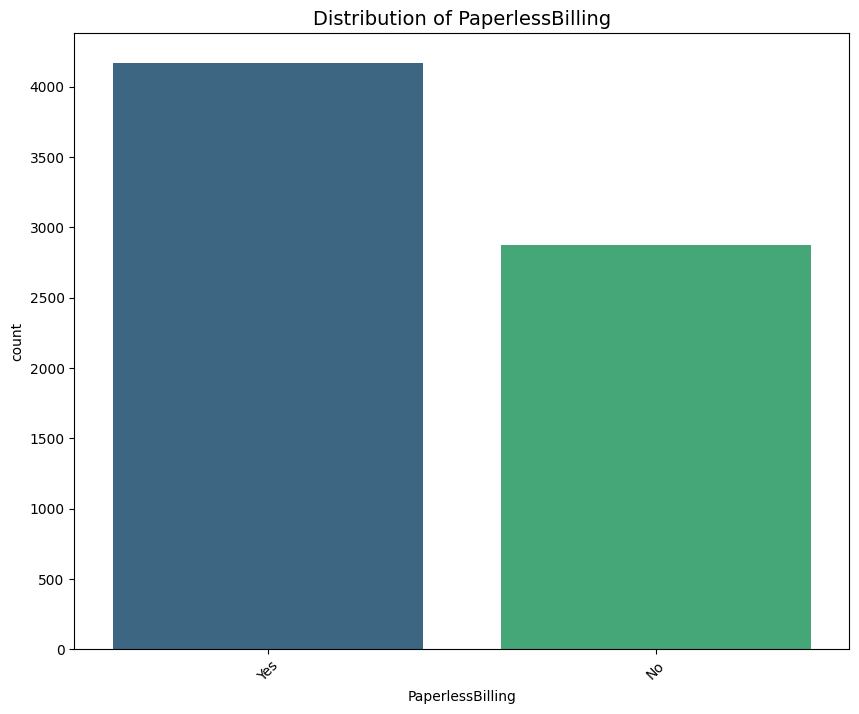

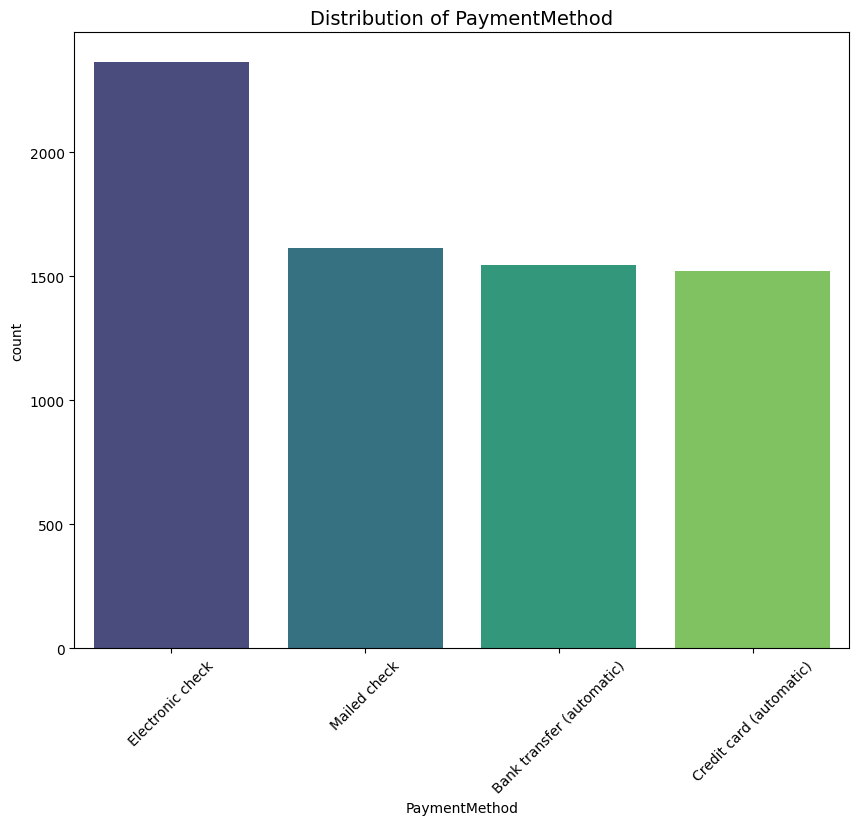

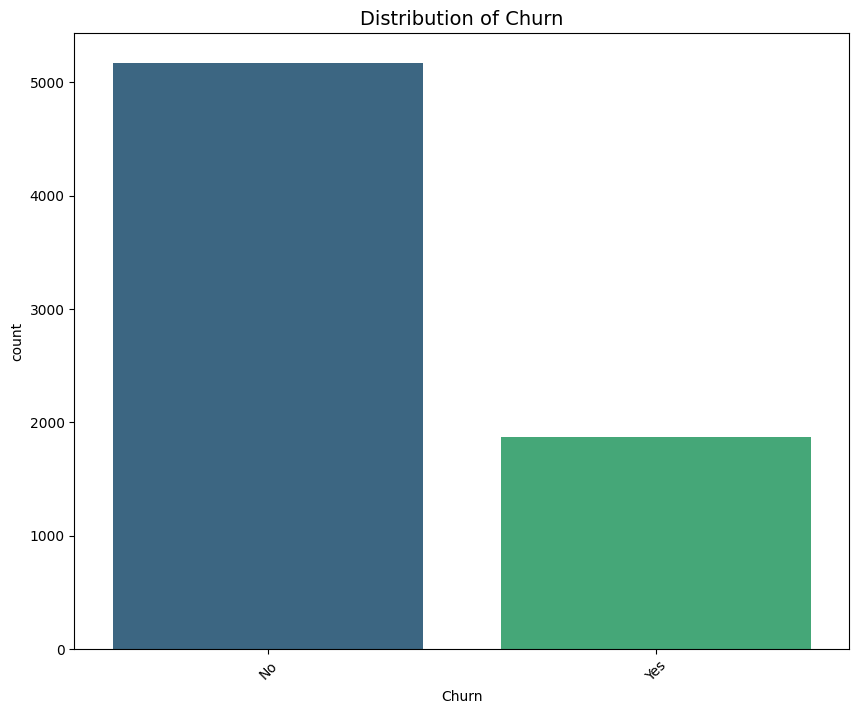

In [10]:
categorical_col=['gender','Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
for col in categorical_col:
    plt.figure(figsize=(10,8))
    sns.countplot(data=df,x=col,palette="viridis",order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}',fontsize=14)
    plt.xticks(rotation=45)

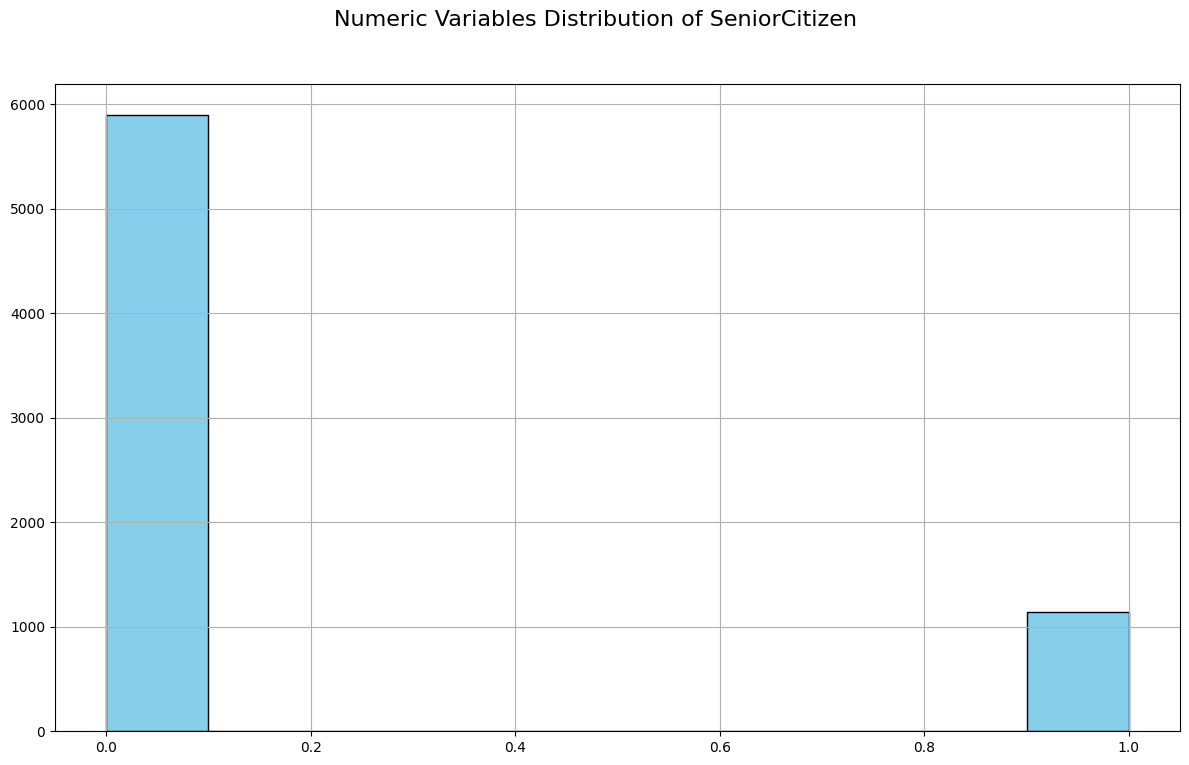

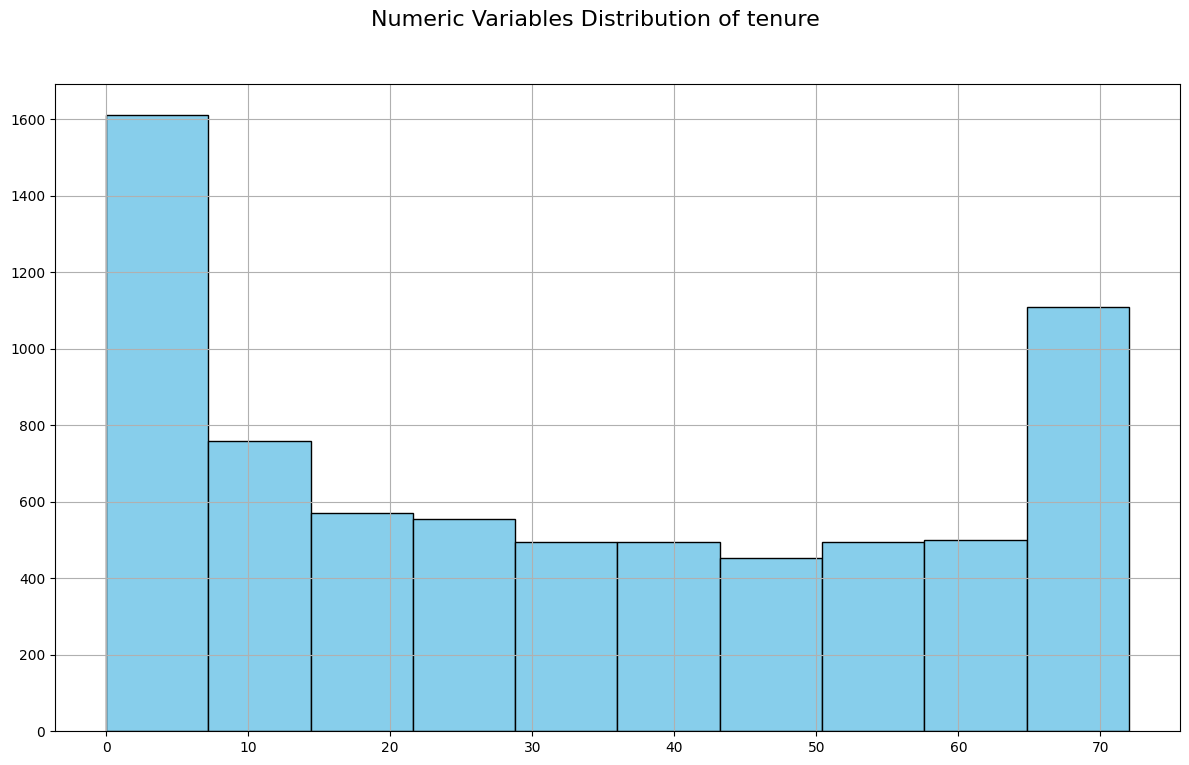

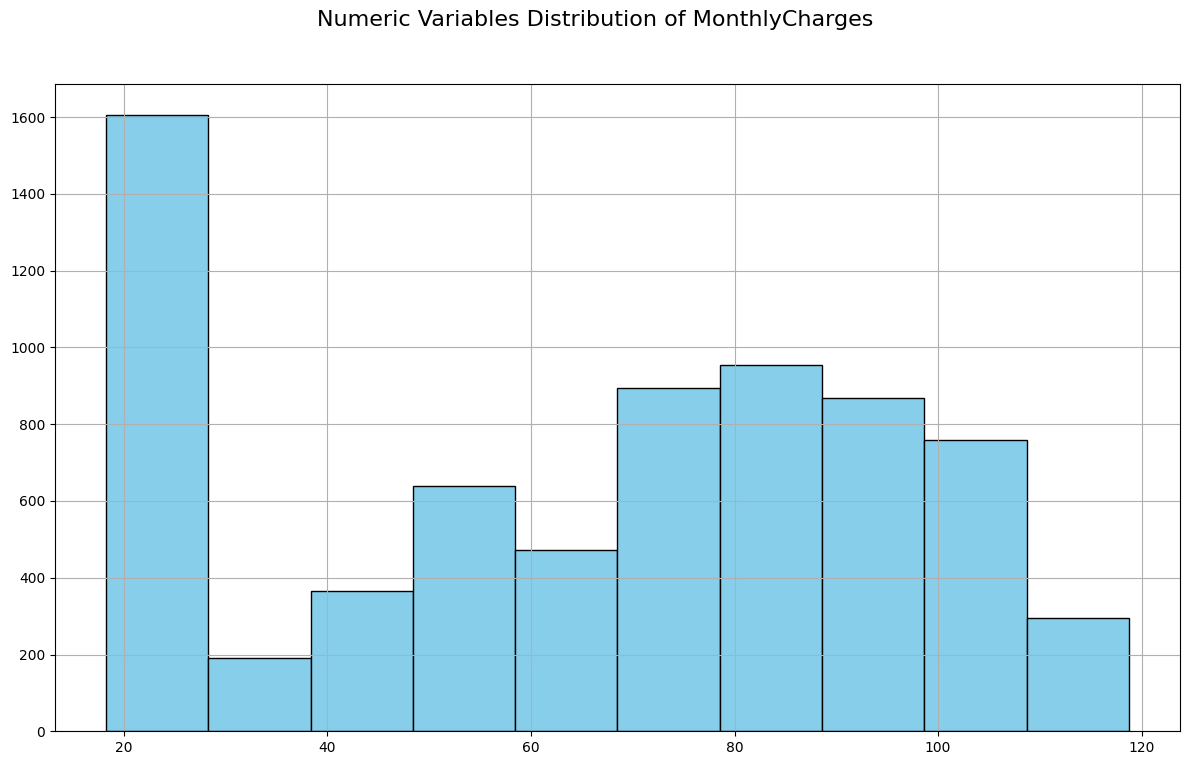

In [11]:
numerical_cols=['SeniorCitizen','tenure','MonthlyCharges']
for cols in numerical_cols:
    plt.figure(figsize=(10,8))
    df[cols].hist(figsize=(12, 8), bins=10, color='skyblue', edgecolor='black')
    plt.suptitle(f"Numeric Variables Distribution of {cols}", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# EDA : Correaltion Analysis

<Axes: >

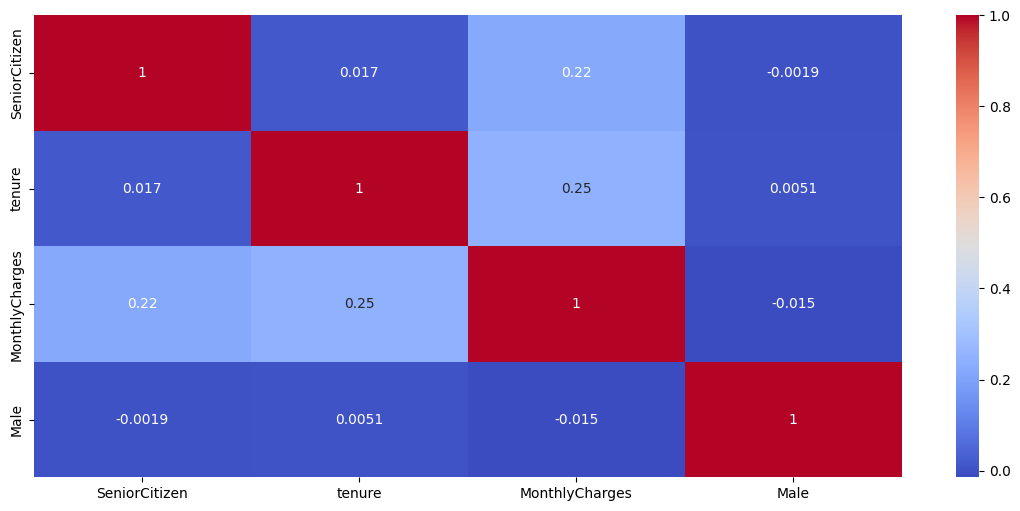

In [12]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',annot=True)

In [13]:
df=df.drop(columns=['customerID','gender','Partner','Dependents','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod'])

# Data Preprocessing 
Data preprocessing involves preparing and cleaning data before feeding it into a machine learning model. This typically includes handling missing values, scaling/normalizing features, encoding categorical variables, and splitting the data into training and test sets. When using label encoding and one-hot encoding for ordinal data:

Label Encoding: Convert ordinal categories into numeric values that reflect the inherent order (e.g., "Low" = 1, "Medium" = 2, "High" = 3).
One-Hot Encoding: If ordinal categories are treated as nominal (no intrinsic order), create separate binary columns for each category (e.g., "Low", "Medium", "High").

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   MultipleLines     7043 non-null   object 
 4   InternetService   7043 non-null   object 
 5   OnlineSecurity    7043 non-null   object 
 6   OnlineBackup      7043 non-null   object 
 7   DeviceProtection  7043 non-null   object 
 8   TechSupport       7043 non-null   object 
 9   Contract          7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  Churn             7043 non-null   object 
 13  Male              7043 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 770.5+ KB


In [17]:
df=pd.get_dummies(df, columns=['MultipleLines','Contract'])

In [18]:
df=pd.get_dummies(df, columns=['InternetService'])

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()

In [21]:
col_obj=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Churn','PhoneService']
for col in col_obj:
    df[col]=le.fit_transform(df[col])
    

In [22]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

# Train and test split Data

In [23]:
X=df.drop(columns=['TotalCharges','Churn'])
y=df['Churn']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=91)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
models={
    'Logistic Regression':LogisticRegression(max_iter=10000, random_state=42),
    'KNN':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(n_estimators=100, random_state=42) }

In [28]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
results=[]
for name,model in models.items():
    accuracy,precision,recall,f1=evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append({
        "Model":name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

In [30]:
results_df=pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.794890,0.785870,0.794890,0.788517
1,KNN,0.766501,0.757635,0.766501,0.761043
2,Decision Tree,0.739532,0.740198,0.739532,0.739861
3,Random Forest,0.758694,0.745300,0.758694,0.749655



Best Model (Machine Learning):
Model        Logistic Regression
Accuracy                 0.79489
Precision                0.78587
Recall                   0.79489
F1-Score                0.788517
Name: 0, dtype: object


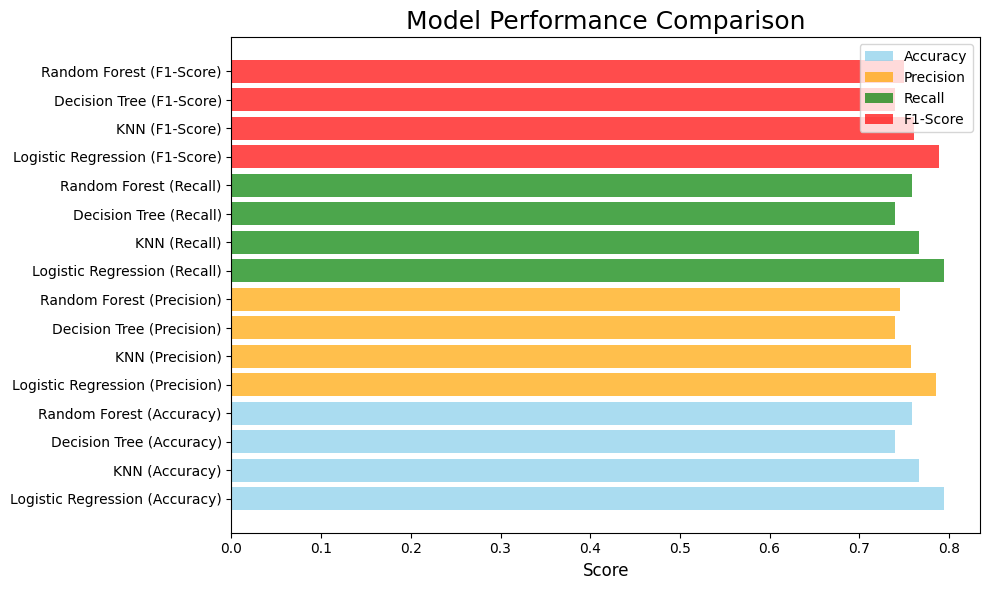


Optimal Model based on Accuracy: Logistic Regression with Accuracy = 0.7949


In [31]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model (Machine Learning):")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")

# Logistic Regression
Logistic regression is a statistical model used for binary classification, predicting the probability of an outcome using a logistic function. It outputs probabilities between 0 and 1, which are then mapped to the closest class.

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr=LogisticRegression(solver='liblinear')

In [34]:
lr.fit(X,y)

LogisticRegression(solver='liblinear')

In [35]:
lr_pred=lr.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1034
           1       0.65      0.53      0.58       375

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



# Cross-Validation
Cross-validation is a technique used to assess the model's performance by partitioning the data into multiple subsets, training on some and testing on others, ensuring the model's robustness and preventing overfitting.

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score

In [39]:
scores = cross_val_score(lr, X, y, cv=5, scoring='accuracy')

# Step 4: Print the cross-validation results
print(f"Cross-validation scores for each fold: {scores}")
print(f"Mean cross-validation score: {scores.mean()}")
print(f"Standard deviation of cross-validation scores: {scores.std()}")

Cross-validation scores for each fold: [0.80624556 0.81192335 0.78424414 0.80326705 0.80113636]
Mean cross-validation score: 0.801363293599587
Standard deviation of cross-validation scores: 0.009296153827892662


# Positive and Negative Coefficients:
In logistic regression, positive coefficients indicate that an increase in the corresponding feature increases the likelihood of the positive class, while negative coefficients suggest that an increase in the feature decreases the probability of the positive class.

In [40]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_[0]
})

# Interpret the coefficients
print(coefficients)

                           Feature  Coefficient
0                    SeniorCitizen     0.283319
1                           tenure    -0.034922
2                     PhoneService    -0.681015
3                   OnlineSecurity    -0.280590
4                     OnlineBackup    -0.129450
5                 DeviceProtection    -0.080169
6                      TechSupport    -0.254426
7                   MonthlyCharges     0.029616
8                             Male    -0.030661
9                 MultipleLines_No    -0.427901
10  MultipleLines_No phone service     0.017989
11               MultipleLines_Yes    -0.253113
12         Contract_Month-to-month     0.512704
13               Contract_One year    -0.230423
14               Contract_Two year    -0.945306
15             InternetService_DSL    -0.486039
16     InternetService_Fiber optic    -0.205309
17              InternetService_No     0.028322
